C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1814947411.py:4: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('20240424-GRID_INCIDENTS.csv')
C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1814947411.py:13: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


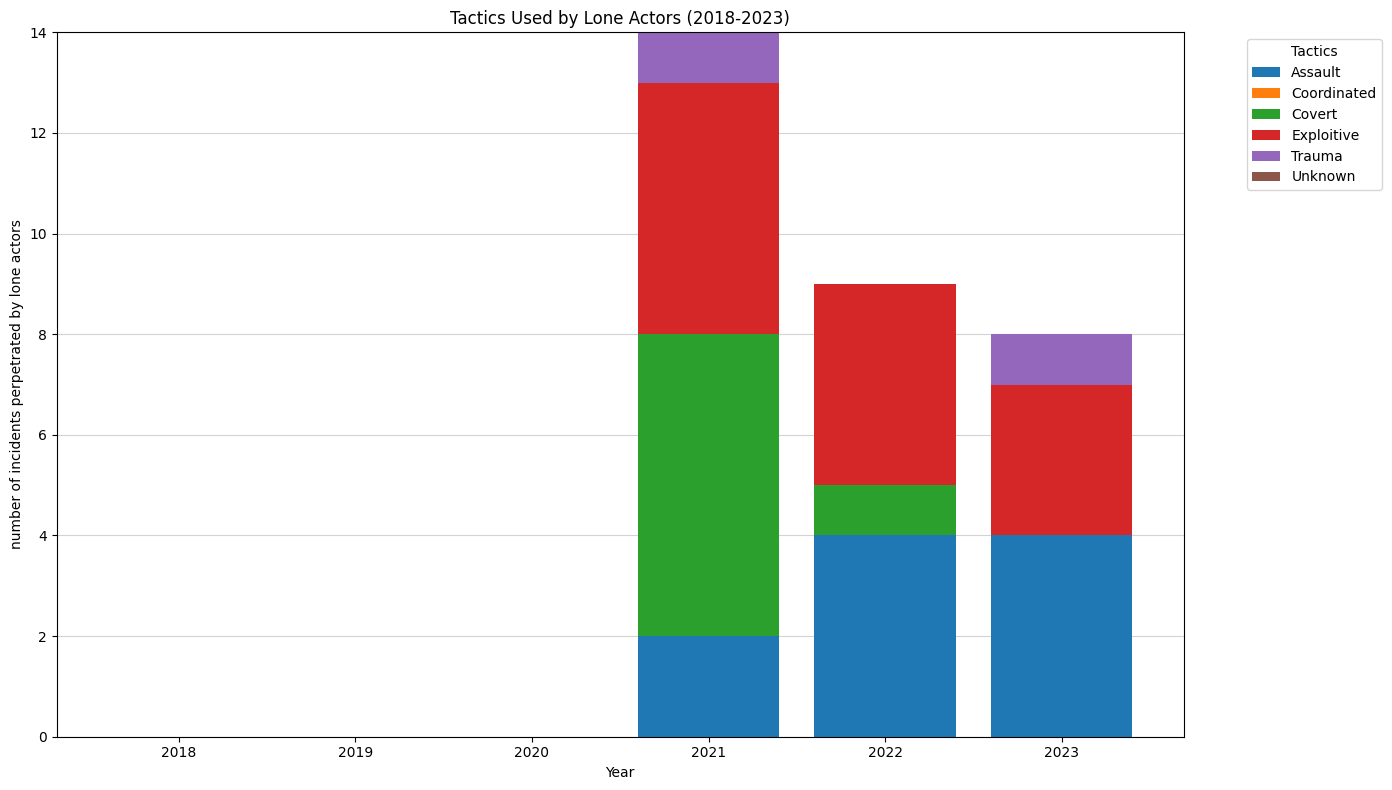

In [60]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('20240424-GRID_INCIDENTS.csv')
# %%
data.head()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded with the relevant incident data
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Mapping original column names to desired names for legibility
column_names_mapping = {
    'tactic_lvl1_as': 'Assault',
    'tactic_lvl1_co': 'Coordinated',
    'tactic_lvl1_cv': 'Covert',
    'tactic_lvl1_ex': 'Exploitive',
    'tactic_lvl1_tr': 'Trauma',
    'tactic_lvl1_un': 'Unknown'
}

years = range(2018, 2024)

# Filtering data for lone actors only
lone_actor_incidents = data[(data['incident_year'] >= 2018) & 
                            (data['incident_year'] <= 2023) & 
                            (data['ICat_Single'] == 1)]

# Initialize a dataframe to store the count of each tactic per year
tactic_counts_per_year = pd.DataFrame(index=years, columns=column_names_mapping.values()).fillna(0)

# Counting occurrences of each tactic per year
for year in years:
    yearly_data = lone_actor_incidents[lone_actor_incidents['incident_year'] == year]
    for tactic, mapped_name in column_names_mapping.items():
        # Sum up all the entries for a given tactic in a given year
        tactic_counts_per_year.loc[year, mapped_name] = yearly_data[tactic].sum()

# Plotting
plt.figure(figsize=(14, 8))
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)

index = np.arange(len(years))
bottom = np.zeros(len(years))

# Plotting each tactic as a separate bar within each year group
for tactic in column_names_mapping.values():
    plt.bar(index, tactic_counts_per_year[tactic], bottom=bottom, label=tactic)
    # Update the bottom to stack the next tactic on top
    bottom += tactic_counts_per_year[tactic]
    
plt.title('Tactics Used by Lone Actors (2018-2023)')
plt.xlabel('Year')
plt.ylabel('number of incidents perpetrated by lone actors')
plt.xticks(index, [str(year) for year in years])
plt.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()


C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\414244427.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


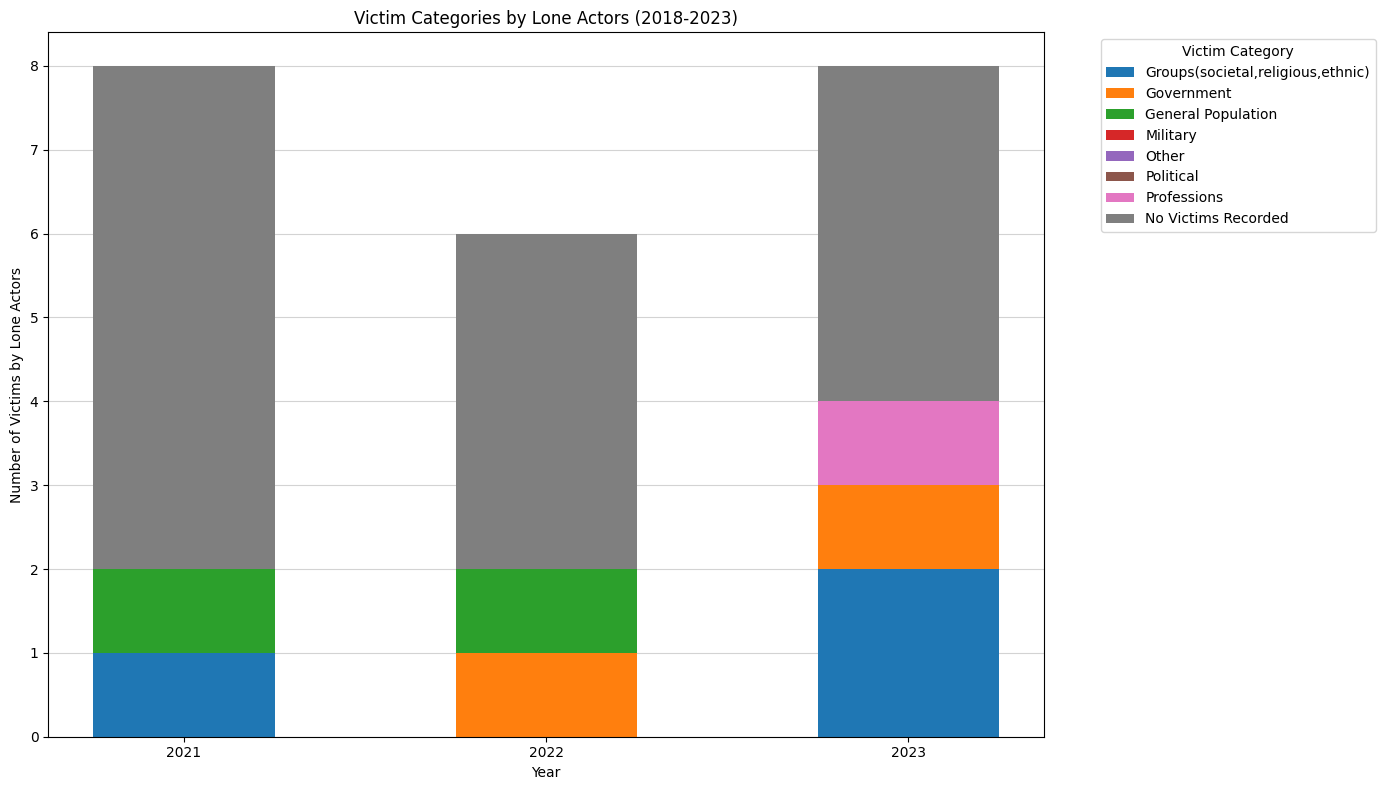

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and incidents involving lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Single'] == 1]

# Aggregate data by year for each victim category at level 1
aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'victim_lvl1_ci': 'sum',
    'victim_lvl1_go': 'sum',
    'victim_lvl1_gp': 'sum',
    'victim_lvl1_mi': 'sum',
    'victim_lvl1_ot': 'sum',
    'victim_lvl1_po': 'sum',
    'victim_lvl1_pr': 'sum',
    'victim_lvl1_nn': 'sum'
}).reset_index()

# Map original column names to new names for clarity
column_names_mapping = {
    'victim_lvl1_ci': 'Groups(societal,religious,ethnic)',
    'victim_lvl1_go': 'Government',
    'victim_lvl1_gp': 'General Population',
    'victim_lvl1_mi': 'Military',
    'victim_lvl1_ot': 'Other',
    'victim_lvl1_po': 'Political',
    'victim_lvl1_pr': 'Professions',
    'victim_lvl1_nn': 'No Victims Recorded'
}

# Rename columns in the aggregated data
aggregated_data.rename(columns=column_names_mapping, inplace=True)

plt.figure(figsize=(14, 8))

index = np.arange(len(aggregated_data['incident_year']))  # x-axis positions for the bars

# Initialize an array of zeros for the bottom argument of the first set of bars
bottom_array = np.zeros(len(aggregated_data))

for column in aggregated_data.columns[1:]:  # Skip 'incident_year' column
    plt.bar(index, aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += aggregated_data[column].values

plt.gca().set_axisbelow(True)  # This ensures the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


plt.title('Victim Categories by Lone Actors (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Victims by Lone Actors')

# Set the x-ticks to match the years
plt.xticks(index, aggregated_data['incident_year'])

plt.legend(title="Victim Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\2507371125.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


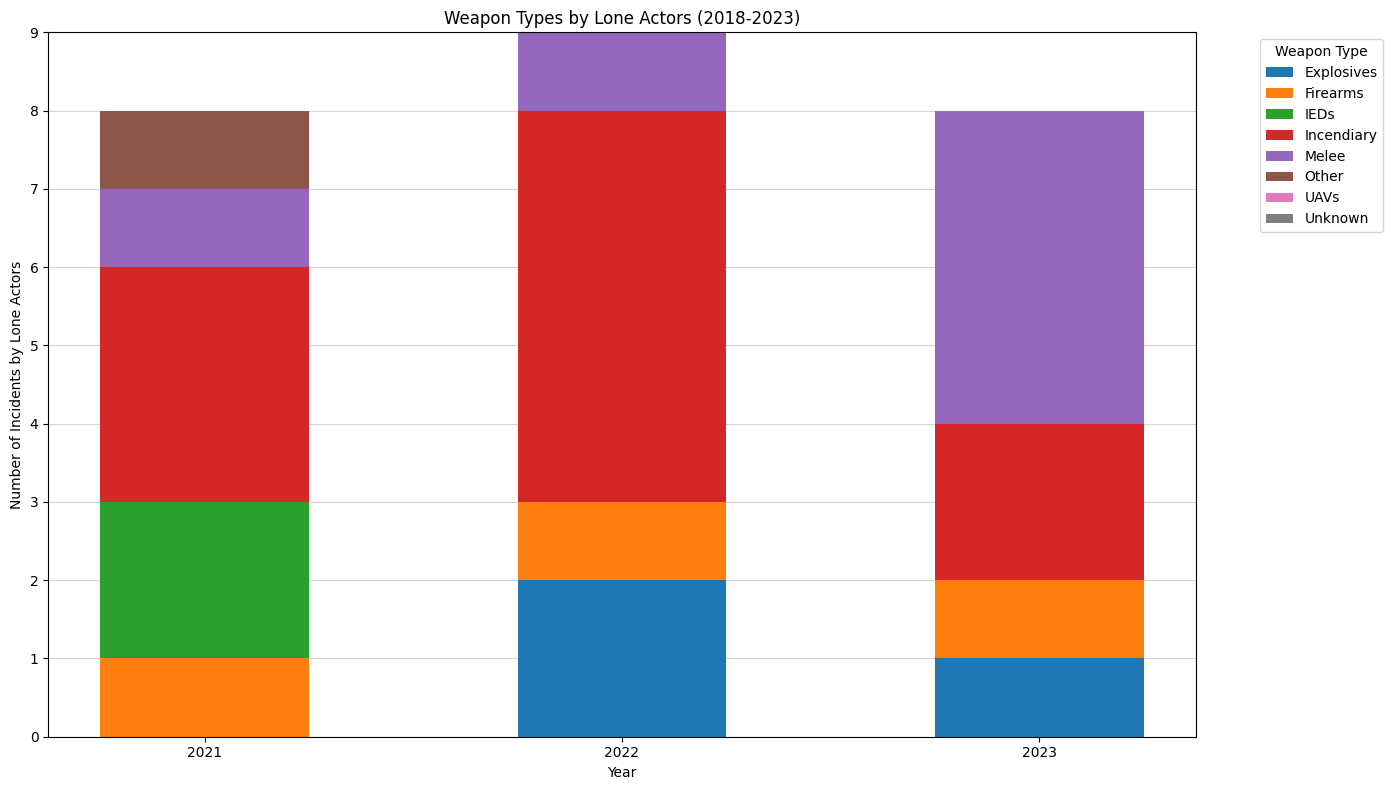

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and for lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Single'] == 1]

# Aggregate data by year for each weapon type at Level 1
weapon_aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'weapon_lvl1_ex': 'sum',
    'weapon_lvl1_fi': 'sum',
    'weapon_lvl1_im': 'sum',
    'weapon_lvl1_in': 'sum',
    'weapon_lvl1_ml': 'sum',
    'weapon_lvl1_ot': 'sum',
    'weapon_lvl1_ua': 'sum',
    'weapon_lvl1_un': 'sum'
}).reset_index()

# Map original column names to the new, more descriptive names
column_names_mapping = {
    'weapon_lvl1_ex': 'Explosives',
    'weapon_lvl1_fi': 'Firearms',
    'weapon_lvl1_im': 'IEDs',
    'weapon_lvl1_in': 'Incendiary',
    'weapon_lvl1_ml': 'Melee',
    'weapon_lvl1_ot': 'Other',
    'weapon_lvl1_ua': 'UAVs',
    'weapon_lvl1_un': 'Unknown'
}

# Rename columns in the aggregated data
weapon_aggregated_data.rename(columns=column_names_mapping, inplace=True)

# Plotting
# Setting up the figure for plotting
plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(weapon_aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(weapon_aggregated_data))

for column in weapon_aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, weapon_aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += weapon_aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


plt.title('Weapon Types by Lone Actors (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents by Lone Actors')

# Set the x-ticks to match the years
plt.xticks(index, weapon_aggregated_data['incident_year'])

plt.legend(title="Weapon Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\999041167.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


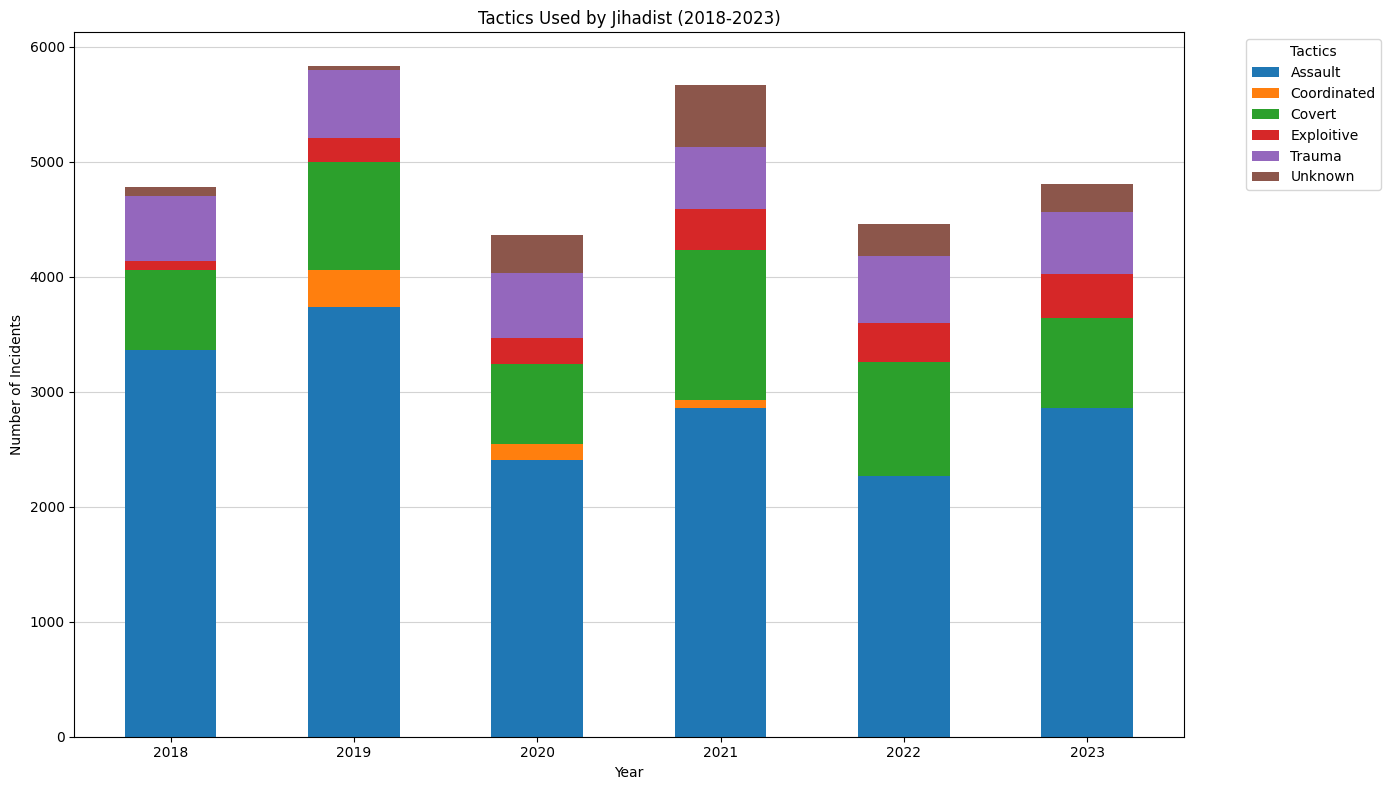

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded with the relevant incident data
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Mapping original column names to desired names for legibility
column_names_mapping = {
    'tactic_lvl1_as': 'Assault',
    'tactic_lvl1_co': 'Coordinated',
    'tactic_lvl1_cv': 'Covert',
    'tactic_lvl1_ex': 'Exploitive',
    'tactic_lvl1_tr': 'Trauma',
    'tactic_lvl1_un': 'Unknown'
}

years = range(2018, 2024)

# Filtering data for lone actors only
lone_actor_incidents = data[(data['incident_year'] >= 2018) & 
                            (data['incident_year'] <= 2023) & 
                            (data['ICat_Rjih'] == 1)]

# Initialize a dataframe to store the count of each tactic per year
tactic_counts_per_year = pd.DataFrame(index=years, columns=column_names_mapping.values()).fillna(0)

# Counting occurrences of each tactic per year
for year in years:
    yearly_data = lone_actor_incidents[lone_actor_incidents['incident_year'] == year]
    for tactic, mapped_name in column_names_mapping.items():
        # Sum up all the entries for a given tactic in a given year
        tactic_counts_per_year.loc[year, mapped_name] = yearly_data[tactic].sum()

# Plotting
bar_width = 0.15  # Width of the bars
index = np.arange(len(years))  # Positioning for each group of bars

plt.figure(figsize=(14, 8))
index = np.arange(len(years))  # x-axis positions for the bars
plt.gca().set_axisbelow(True)  # This line is crucial
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


# Initialize an array of zeros to serve as the base for the first set of bars
bottom_array = np.zeros(len(years))

for tactic, mapped_name in column_names_mapping.items():
    plt.bar(index, tactic_counts_per_year[mapped_name], bottom=bottom_array, label=mapped_name, width=0.5)
    # Update the bottom for the next set of bars
    bottom_array += tactic_counts_per_year[mapped_name].values

plt.title('Tactics Used by Jihadist (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(index, [str(year) for year in years])  # Setting the x-ticks to correspond to the years

plt.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()


C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1781129444.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


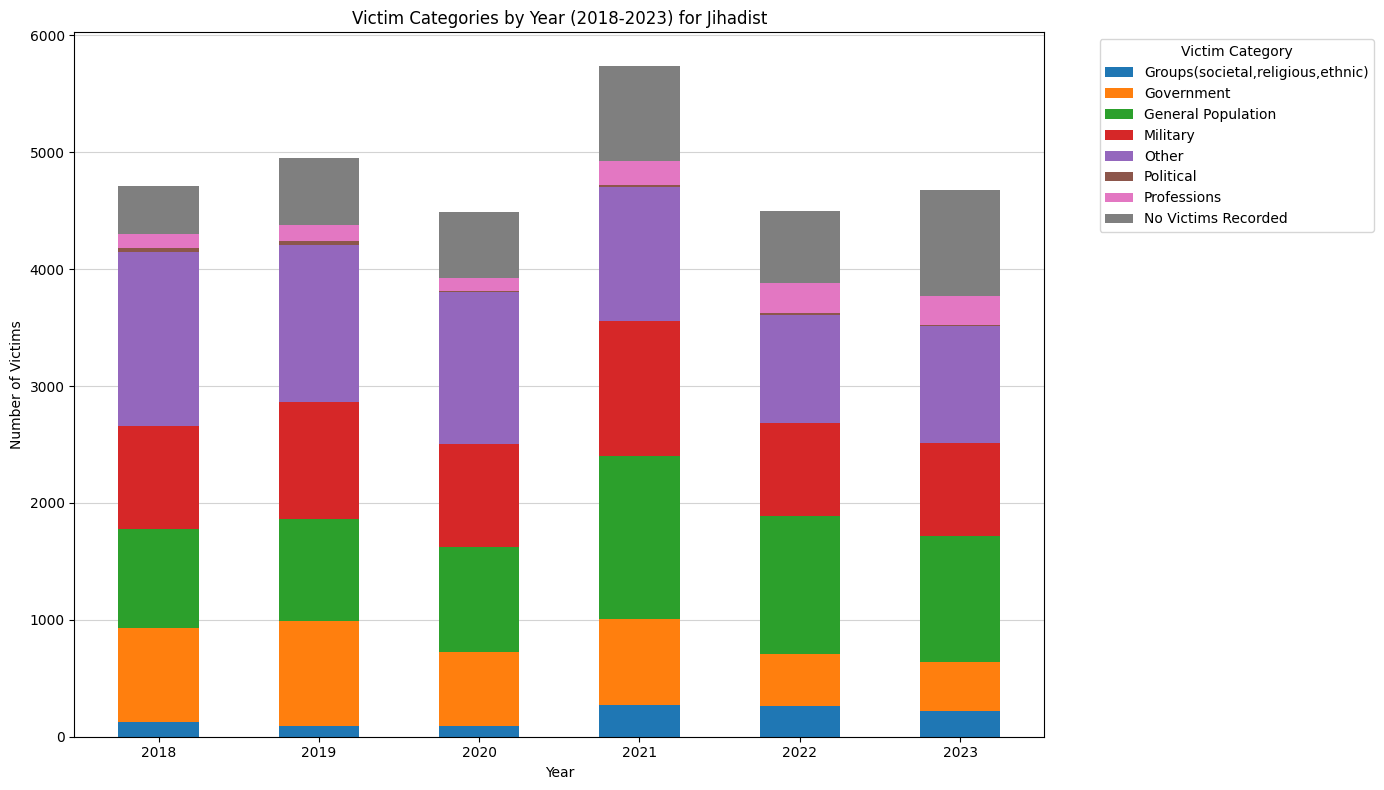

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and incidents involving lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Rjih'] == 1]

# Aggregate data by year for each victim category at level 1
aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'victim_lvl1_ci': 'sum',
    'victim_lvl1_go': 'sum',
    'victim_lvl1_gp': 'sum',
    'victim_lvl1_mi': 'sum',
    'victim_lvl1_ot': 'sum',
    'victim_lvl1_po': 'sum',
    'victim_lvl1_pr': 'sum',
    'victim_lvl1_nn': 'sum'
}).reset_index()

# Map original column names to new names for clarity
column_names_mapping = {
    'victim_lvl1_ci': 'Groups(societal,religious,ethnic)',
    'victim_lvl1_go': 'Government',
    'victim_lvl1_gp': 'General Population',
    'victim_lvl1_mi': 'Military',
    'victim_lvl1_ot': 'Other',
    'victim_lvl1_po': 'Political',
    'victim_lvl1_pr': 'Professions',
    'victim_lvl1_nn': 'No Victims Recorded'
}

# Rename columns in the aggregated data
aggregated_data.rename(columns=column_names_mapping, inplace=True)

plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom for each stack
bottom_array = np.zeros(len(aggregated_data['incident_year']))

for column in aggregated_data.columns[1:]:  # Skip 'incident_year' column
    plt.bar(index, aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


plt.title('Victim Categories by Year (2018-2023) for Jihadist')
plt.xlabel('Year')
plt.ylabel('Number of Victims')

# Set the x-ticks to match the years
plt.xticks(index, aggregated_data['incident_year'])

plt.legend(title="Victim Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1386906812.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


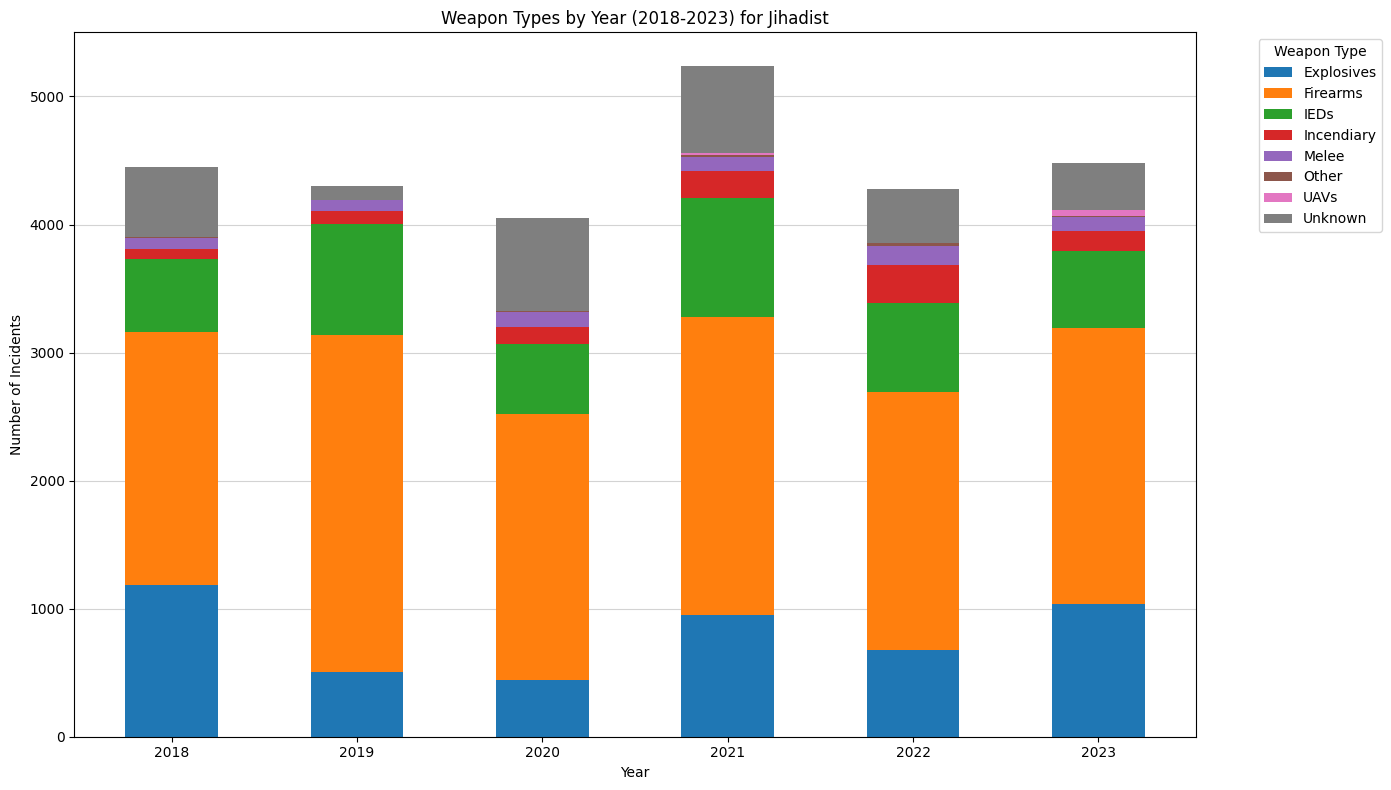

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and for lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Rjih'] == 1]

# Aggregate data by year for each weapon type at Level 1
weapon_aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'weapon_lvl1_ex': 'sum',
    'weapon_lvl1_fi': 'sum',
    'weapon_lvl1_im': 'sum',
    'weapon_lvl1_in': 'sum',
    'weapon_lvl1_ml': 'sum',
    'weapon_lvl1_ot': 'sum',
    'weapon_lvl1_ua': 'sum',
    'weapon_lvl1_un': 'sum'
}).reset_index()

# Map original column names to the new, more descriptive names
column_names_mapping = {
    'weapon_lvl1_ex': 'Explosives',
    'weapon_lvl1_fi': 'Firearms',
    'weapon_lvl1_im': 'IEDs',
    'weapon_lvl1_in': 'Incendiary',
    'weapon_lvl1_ml': 'Melee',
    'weapon_lvl1_ot': 'Other',
    'weapon_lvl1_ua': 'UAVs',
    'weapon_lvl1_un': 'Unknown'
}

# Rename columns in the aggregated data
weapon_aggregated_data.rename(columns=column_names_mapping, inplace=True)

# Plotting
# Setting up the figure for plotting
plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(weapon_aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(weapon_aggregated_data['incident_year']))

for column in weapon_aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, weapon_aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += weapon_aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


plt.title('Weapon Types by Year (2018-2023) for Jihadist')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Set the x-ticks to match the years
plt.xticks(index, weapon_aggregated_data['incident_year'])

plt.legend(title="Weapon Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1203824732.py:4: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('20240424-GRID_INCIDENTS.csv')
C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\1203824732.py:13: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


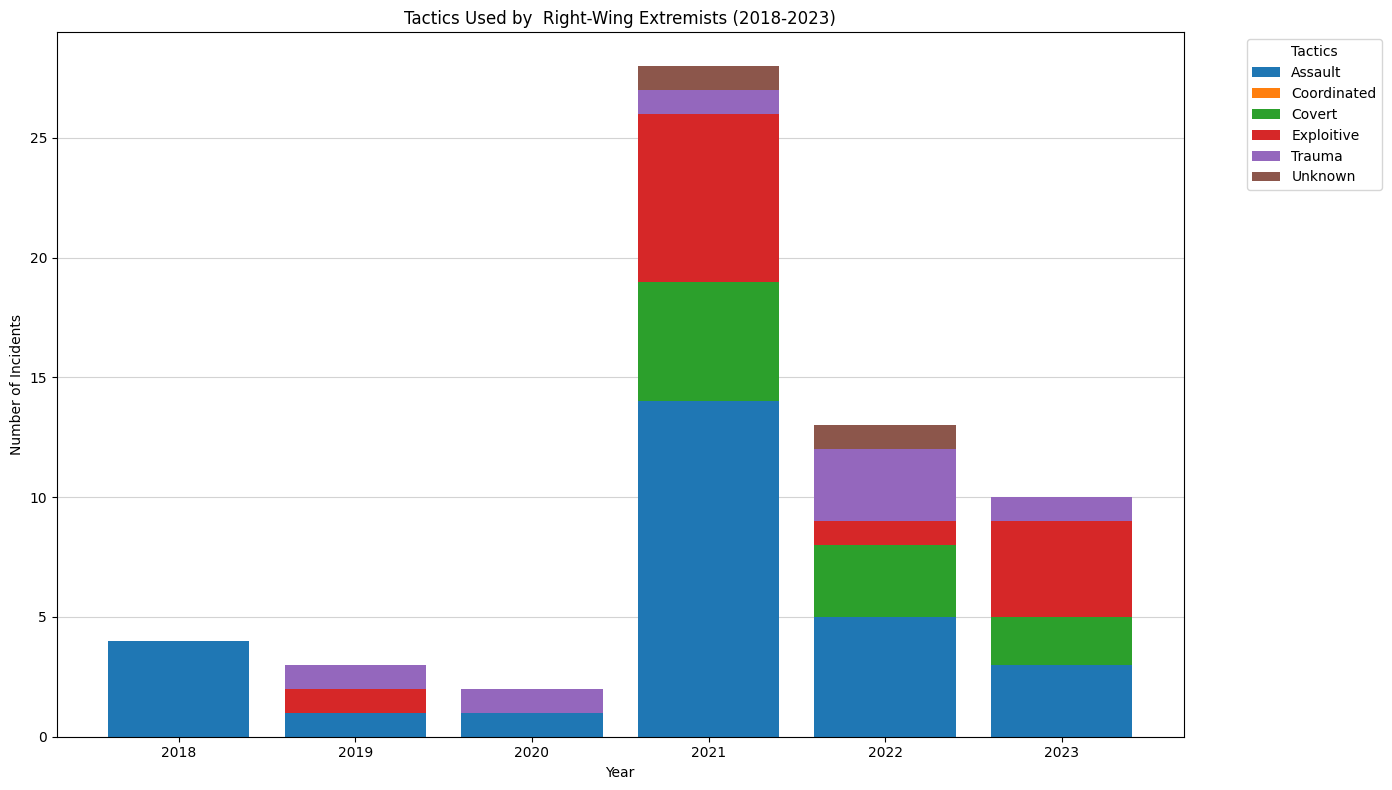

In [54]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('20240424-GRID_INCIDENTS.csv')
# %%
data.head()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded with the relevant incident data
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Mapping original column names to desired names for legibility
column_names_mapping = {
    'tactic_lvl1_as': 'Assault',
    'tactic_lvl1_co': 'Coordinated',
    'tactic_lvl1_cv': 'Covert',
    'tactic_lvl1_ex': 'Exploitive',
    'tactic_lvl1_tr': 'Trauma',
    'tactic_lvl1_un': 'Unknown'
}

years = range(2018, 2024)

# Filtering data for lone actors only
lone_actor_incidents = data[(data['incident_year'] >= 2018) & 
                            (data['incident_year'] <= 2023) & 
                            (data['ICat_Right'] == 1)]

# Initialize a dataframe to store the count of each tactic per year
tactic_counts_per_year = pd.DataFrame(index=years, columns=column_names_mapping.values()).fillna(0)

# Counting occurrences of each tactic per year
for year in years:
    yearly_data = lone_actor_incidents[lone_actor_incidents['incident_year'] == year]
    for tactic, mapped_name in column_names_mapping.items():
        # Sum up all the entries for a given tactic in a given year
        tactic_counts_per_year.loc[year, mapped_name] = yearly_data[tactic].sum()

# Plotting
plt.figure(figsize=(14, 8))
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)

index = np.arange(len(years))
bottom = np.zeros(len(years))

# Plotting each tactic as a separate bar within each year group
for tactic in column_names_mapping.values():
    plt.bar(index, tactic_counts_per_year[tactic], bottom=bottom, label=tactic)
    # Update the bottom to stack the next tactic on top
    bottom += tactic_counts_per_year[tactic]
    
plt.title('Tactics Used by  Right-Wing Extremists (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(index, [str(year) for year in years])
plt.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()


C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\3562856928.py:7: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


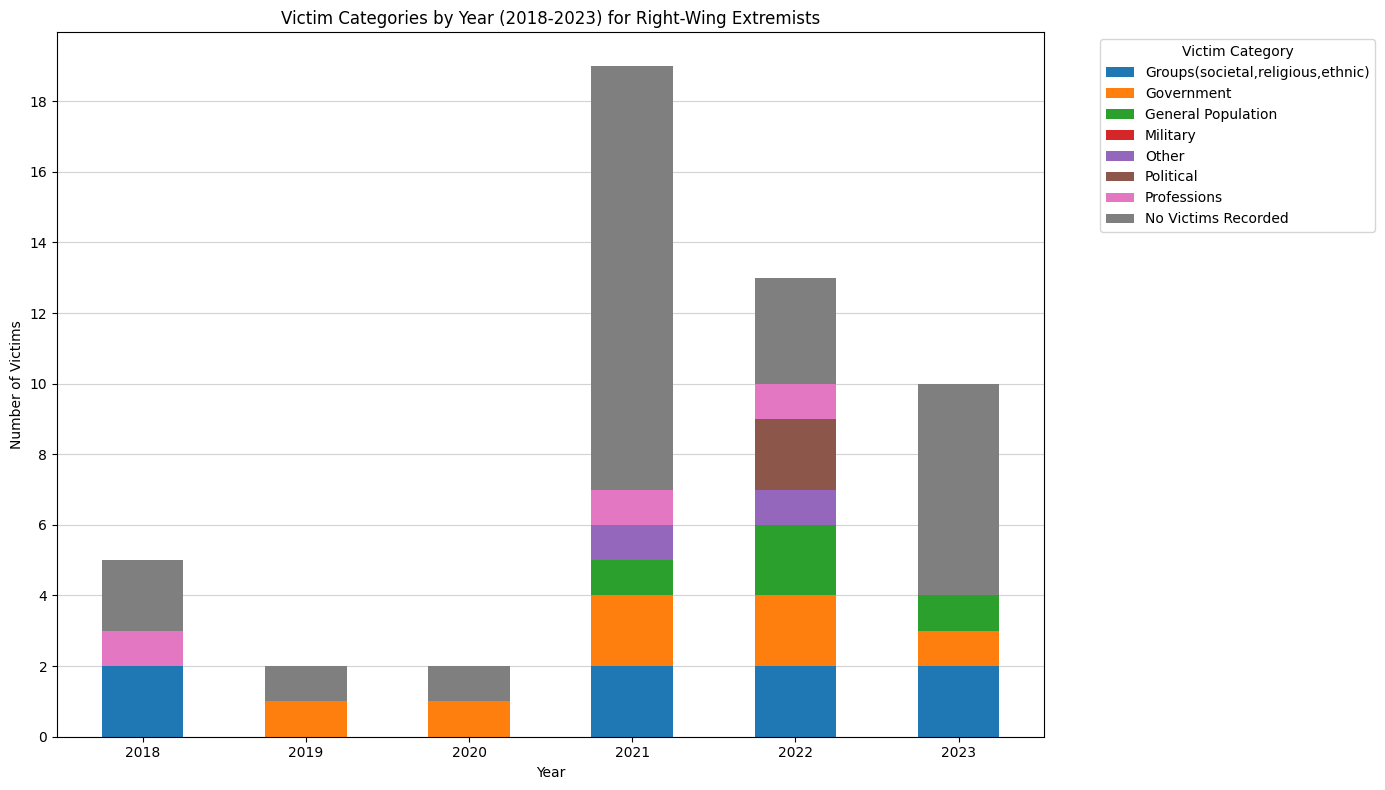

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and incidents involving lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Right'] == 1]

# Aggregate data by year for each victim category at level 1
aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'victim_lvl1_ci': 'sum',
    'victim_lvl1_go': 'sum',
    'victim_lvl1_gp': 'sum',
    'victim_lvl1_mi': 'sum',
    'victim_lvl1_ot': 'sum',
    'victim_lvl1_po': 'sum',
    'victim_lvl1_pr': 'sum',
    'victim_lvl1_nn': 'sum'
}).reset_index()

# Map original column names to new names for clarity
column_names_mapping = {
    'victim_lvl1_ci': 'Groups(societal,religious,ethnic)',
    'victim_lvl1_go': 'Government',
    'victim_lvl1_gp': 'General Population',
    'victim_lvl1_mi': 'Military',
    'victim_lvl1_ot': 'Other',
    'victim_lvl1_po': 'Political',
    'victim_lvl1_pr': 'Professions',
    'victim_lvl1_nn': 'No Victims Recorded'
}

# Rename columns in the aggregated data
aggregated_data.rename(columns=column_names_mapping, inplace=True)

plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(aggregated_data['incident_year']))

for column in aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


# Use the MaxNLocator with integer argument to ensure y-axis ticks are integers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Victim Categories by Year (2018-2023) for Right-Wing Extremists')
plt.xlabel('Year')
plt.ylabel('Number of Victims')

# Set the x-ticks to match the years
plt.xticks(index, aggregated_data['incident_year'])

plt.legend(title="Victim Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\2475083460.py:7: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


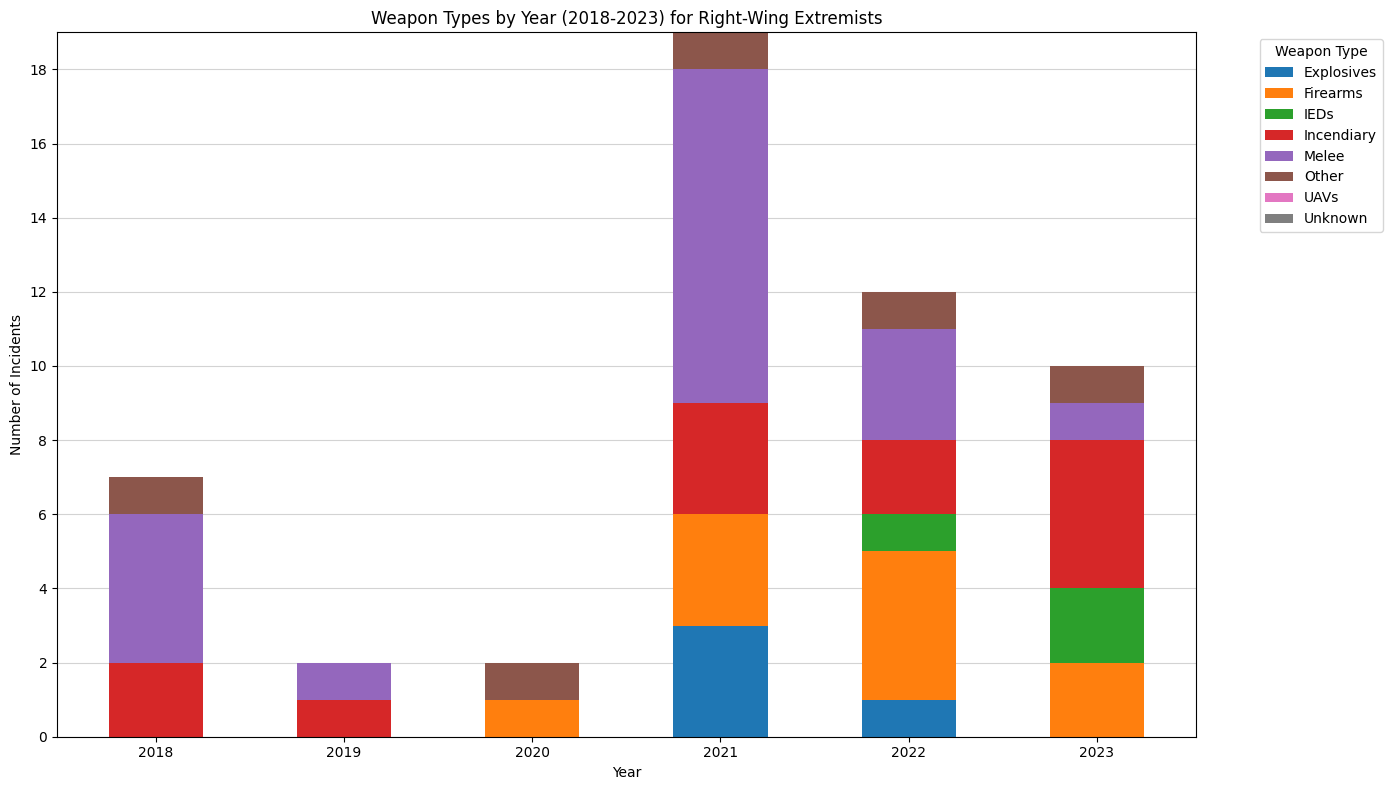

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and for lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Right'] == 1]

# Aggregate data by year for each weapon type at Level 1
weapon_aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'weapon_lvl1_ex': 'sum',
    'weapon_lvl1_fi': 'sum',
    'weapon_lvl1_im': 'sum',
    'weapon_lvl1_in': 'sum',
    'weapon_lvl1_ml': 'sum',
    'weapon_lvl1_ot': 'sum',
    'weapon_lvl1_ua': 'sum',
    'weapon_lvl1_un': 'sum'
}).reset_index()

# Map original column names to the new, more descriptive names
column_names_mapping = {
    'weapon_lvl1_ex': 'Explosives',
    'weapon_lvl1_fi': 'Firearms',
    'weapon_lvl1_im': 'IEDs',
    'weapon_lvl1_in': 'Incendiary',
    'weapon_lvl1_ml': 'Melee',
    'weapon_lvl1_ot': 'Other',
    'weapon_lvl1_ua': 'UAVs',
    'weapon_lvl1_un': 'Unknown'
}

# Rename columns in the aggregated data
weapon_aggregated_data.rename(columns=column_names_mapping, inplace=True)

# Plotting
# Setting up the figure for plotting
plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(weapon_aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(weapon_aggregated_data['incident_year']))

for column in weapon_aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, weapon_aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += weapon_aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


# Use the MaxNLocator with integer argument to ensure y-axis ticks are integers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Weapon Types by Year (2018-2023) for Right-Wing Extremists')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Set the x-ticks to match the years
plt.xticks(index, weapon_aggregated_data['incident_year'])

plt.legend(title="Weapon Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\3314217286.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


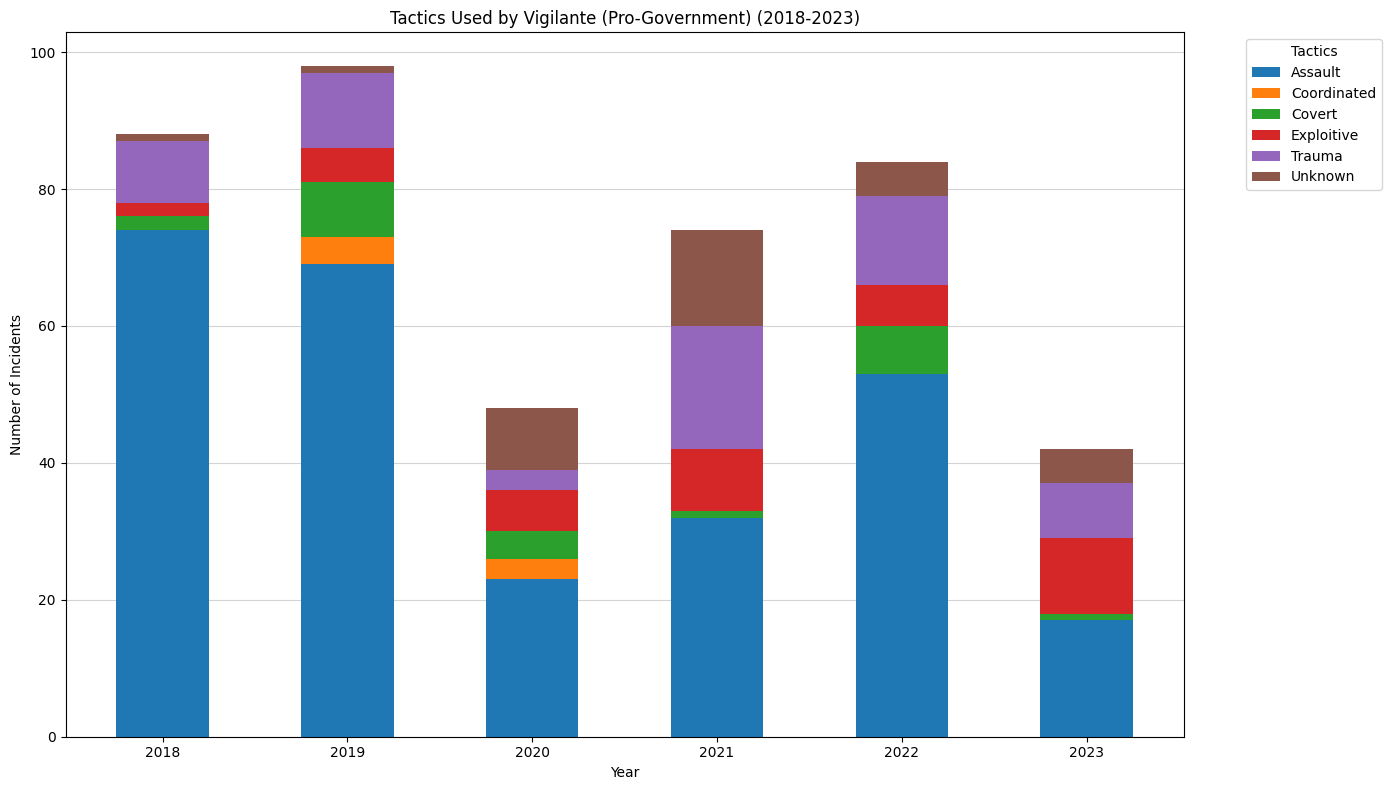

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded with the relevant incident data
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Mapping original column names to desired names for legibility
column_names_mapping = {
    'tactic_lvl1_as': 'Assault',
    'tactic_lvl1_co': 'Coordinated',
    'tactic_lvl1_cv': 'Covert',
    'tactic_lvl1_ex': 'Exploitive',
    'tactic_lvl1_tr': 'Trauma',
    'tactic_lvl1_un': 'Unknown'
}

years = range(2018, 2024)

# Filtering data for lone actors only
lone_actor_incidents = data[(data['incident_year'] >= 2018) & 
                            (data['incident_year'] <= 2023) & 
                            (data['ICat_Vig'] == 1)]

# Initialize a dataframe to store the count of each tactic per year
tactic_counts_per_year = pd.DataFrame(index=years, columns=column_names_mapping.values()).fillna(0)

# Counting occurrences of each tactic per year
for year in years:
    yearly_data = lone_actor_incidents[lone_actor_incidents['incident_year'] == year]
    for tactic, mapped_name in column_names_mapping.items():
        # Sum up all the entries for a given tactic in a given year
        tactic_counts_per_year.loc[year, mapped_name] = yearly_data[tactic].sum()

# Plotting
bar_width = 0.15  # Width of the bars
index = np.arange(len(years))  # Positioning for each group of bars

plt.figure(figsize=(14, 8))
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


# Positions for the bars on the x-axis
index = np.arange(len(years))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(years))

for tactic in column_names_mapping.values():
    plt.bar(index, tactic_counts_per_year[tactic], bottom=bottom_array, label=tactic, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += tactic_counts_per_year[tactic]

plt.title('Tactics Used by Vigilante (Pro-Government) (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(index, [str(year) for year in years])
plt.legend(title='Tactics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()



C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\4091689598.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


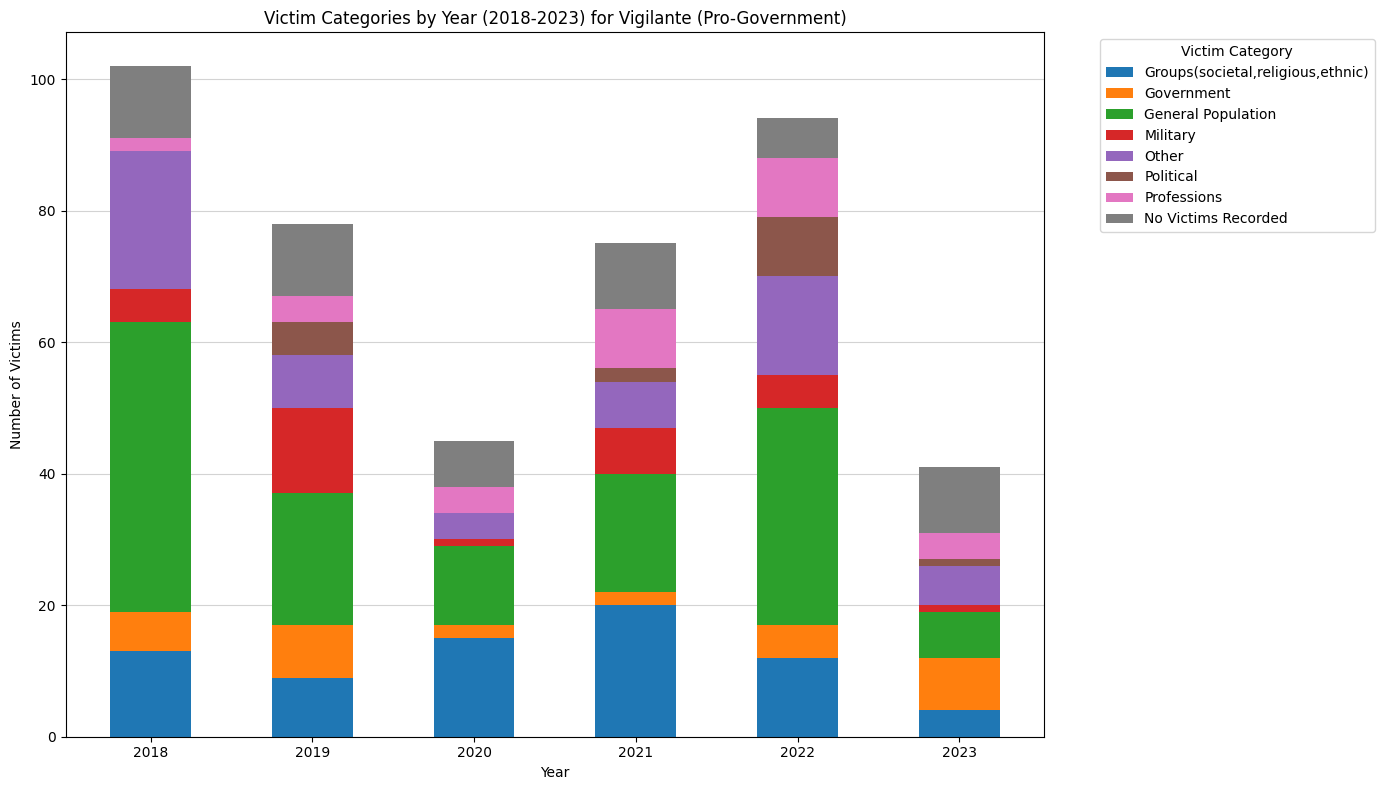

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and incidents involving lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Vig'] == 1]

# Aggregate data by year for each victim category at level 1
aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'victim_lvl1_ci': 'sum',
    'victim_lvl1_go': 'sum',
    'victim_lvl1_gp': 'sum',
    'victim_lvl1_mi': 'sum',
    'victim_lvl1_ot': 'sum',
    'victim_lvl1_po': 'sum',
    'victim_lvl1_pr': 'sum',
    'victim_lvl1_nn': 'sum'
}).reset_index()

# Map original column names to new names for clarity
column_names_mapping = {
    'victim_lvl1_ci': 'Groups(societal,religious,ethnic)',
    'victim_lvl1_go': 'Government',
    'victim_lvl1_gp': 'General Population',
    'victim_lvl1_mi': 'Military',
    'victim_lvl1_ot': 'Other',
    'victim_lvl1_po': 'Political',
    'victim_lvl1_pr': 'Professions',
    'victim_lvl1_nn': 'No Victims Recorded'
}

# Rename columns in the aggregated data
aggregated_data.rename(columns=column_names_mapping, inplace=True)

plt.figure(figsize=(14, 8))

# Positions for the bars on the x-axis
index = np.arange(len(aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(aggregated_data['incident_year']))

for column in aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += aggregated_data[column].values

plt.gca().set_axisbelow(True)  # Ensures that the grid lines are drawn below the bars
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


plt.title('Victim Categories by Year (2018-2023) for Vigilante (Pro-Government)')
plt.xlabel('Year')
plt.ylabel('Number of Victims')

# Set the x-ticks to match the years
plt.xticks(index, aggregated_data['incident_year'])

plt.legend(title="Victim Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()

C:\Users\dpriy\AppData\Local\Temp\ipykernel_11500\3355881808.py:6: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('20240424-GRID_INCIDENTS.csv')


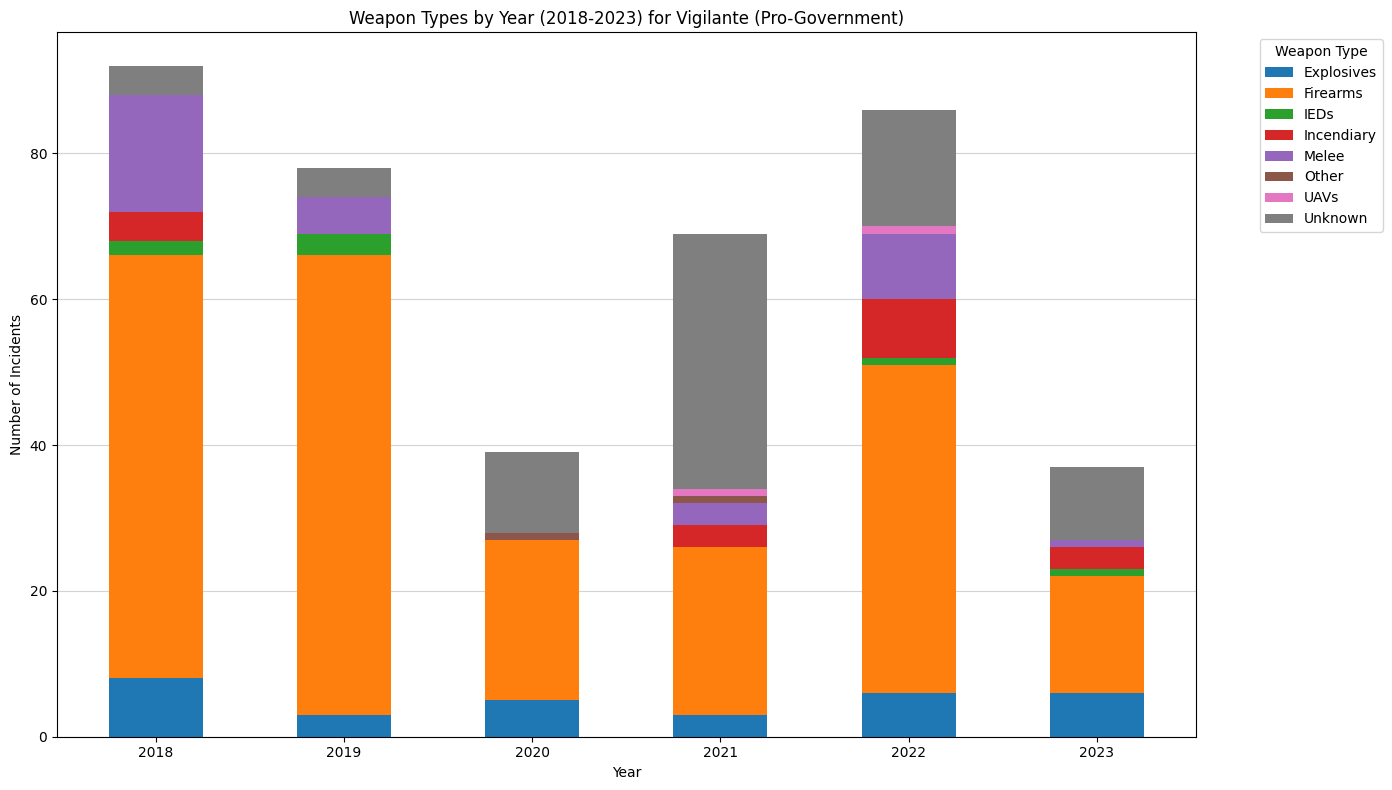

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('20240424-GRID_INCIDENTS.csv')

# Filter the dataset for the years of interest and for lone actors
filtered_data = data[(data['incident_year'] >= 2018) & (data['incident_year'] <= 2023)]
lone_actor_data = filtered_data[filtered_data['ICat_Vig'] == 1]

# Aggregate data by year for each weapon type at Level 1
weapon_aggregated_data = lone_actor_data.groupby('incident_year').agg({
    'weapon_lvl1_ex': 'sum',
    'weapon_lvl1_fi': 'sum',
    'weapon_lvl1_im': 'sum',
    'weapon_lvl1_in': 'sum',
    'weapon_lvl1_ml': 'sum',
    'weapon_lvl1_ot': 'sum',
    'weapon_lvl1_ua': 'sum',
    'weapon_lvl1_un': 'sum'
}).reset_index()

# Map original column names to the new, more descriptive names
column_names_mapping = {
    'weapon_lvl1_ex': 'Explosives',
    'weapon_lvl1_fi': 'Firearms',
    'weapon_lvl1_im': 'IEDs',
    'weapon_lvl1_in': 'Incendiary',
    'weapon_lvl1_ml': 'Melee',
    'weapon_lvl1_ot': 'Other',
    'weapon_lvl1_ua': 'UAVs',
    'weapon_lvl1_un': 'Unknown'
}

# Rename columns in the aggregated data
weapon_aggregated_data.rename(columns=column_names_mapping, inplace=True)

# Plotting
# Setting up the figure for plotting
plt.figure(figsize=(14, 8))
plt.gca().set_axisbelow(True)
plt.grid(True, which='both', axis = 'y', color='lightgrey', linestyle='-', linewidth=0.8, zorder = 0)


# Positions for the bars on the x-axis
index = np.arange(len(weapon_aggregated_data['incident_year']))

# Initialize an array to keep track of the bottom position for each stack
bottom_array = np.zeros(len(weapon_aggregated_data['incident_year']))

for column in weapon_aggregated_data.columns[1:]:  # Skipping the 'incident_year' column
    plt.bar(index, weapon_aggregated_data[column], bottom=bottom_array, label=column, width=0.5)
    # Update the bottom positions for the next set of bars
    bottom_array += weapon_aggregated_data[column].values

plt.title('Weapon Types by Year (2018-2023) for Vigilante (Pro-Government)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# Set the x-ticks to match the years
plt.xticks(index, weapon_aggregated_data['incident_year'])

plt.legend(title="Weapon Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')

plt.show()